In [1]:
from selenium import webdriver
import base64, pickle, time
from IPython.display import Image
from IPython.display import display
from PIL import Image as pil

### Image Download Function

In [2]:
# save image
path = "./pages/"
filename_list = []
def saveImage(driver, filename):
    """ 
        driver : webdriver
        filename : string filename
    """
    time.sleep(3)
    img_str = driver.get_screenshot_as_base64()
    imgdata = base64.b64decode(img_str)
    with open(path + filename, 'wb') as f:
        f.write(imgdata)
    filename_list.append(filename)
    print("Saved : " + filename)
    

### Set Login Process

In [3]:
# open web browser
driver =  webdriver.Chrome()
# driver =  webdriver.PhantomJS()

In [4]:
# clear filename_list
filename_list = []

# move naver main page
print("메인 페이지 이동")
driver.get("http://naver.com")

# save main page
print("메인 페이지 저장")
saveImage(driver, "naver_main.png")

# 로그인 버튼 클릭
print("로그인 버튼 클릭")
driver.find_element_by_css_selector(".lg_global_btn").click()

# save login page
print("로그인 페이지 저장")
saveImage(driver, "naver_login.png")

# 로그인
print("아이디 패스워드 입력후 로그인")
pw = pickle.load(open("../pw.plk", "rb"))
driver.find_element_by_css_selector( "#id" ).send_keys( "1221pdj" )
driver.find_element_by_css_selector( "#pw" ).send_keys( pw )
driver.find_element_by_css_selector(".btn_global").click()

# save login page
print("로그인 후 페이지 저장")
saveImage(driver, "naver_after_login.png")

# 메일 페이지로 이동
print("메일 페이지로 이동")
driver.get("http://mail.naver.com")

# save mail page
print("메일 페이지 저장")
saveImage(driver, "naver_mail.png")

print("브라우져 닫기")
driver.close()

메인 페이지 이동
메인 페이지 저장
Saved : naver_main.png
로그인 버튼 클릭
로그인 페이지 저장
Saved : naver_login.png
아이디 패스워드 입력후 로그인
로그인 후 페이지 저장
Saved : naver_after_login.png
메일 페이지로 이동
메일 페이지 저장
Saved : naver_mail.png
브라우져 닫기


naver_main.png


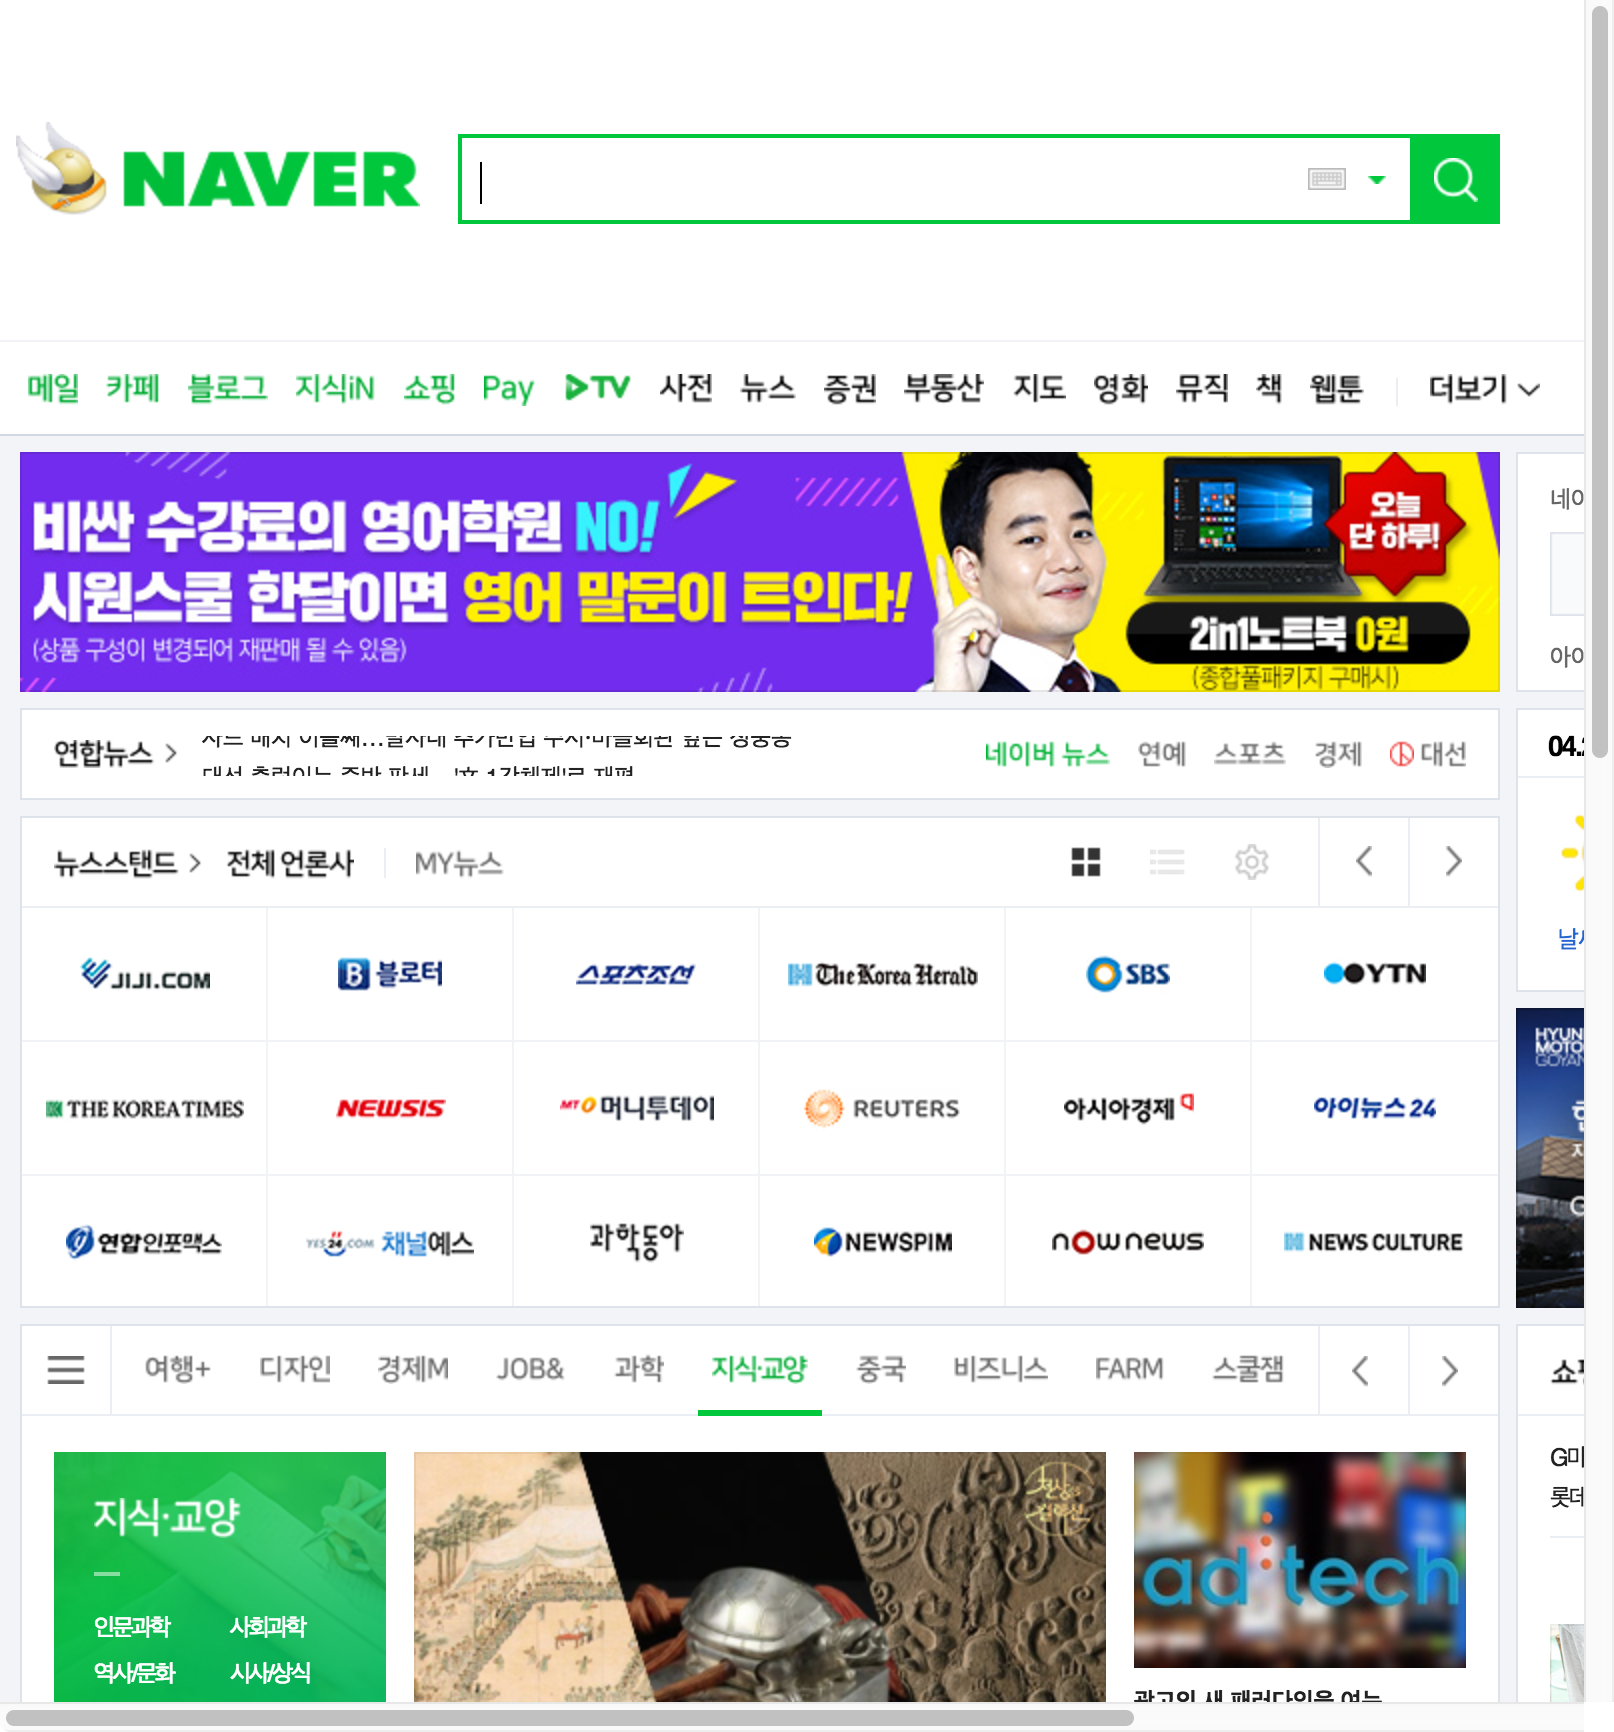

naver_login.png


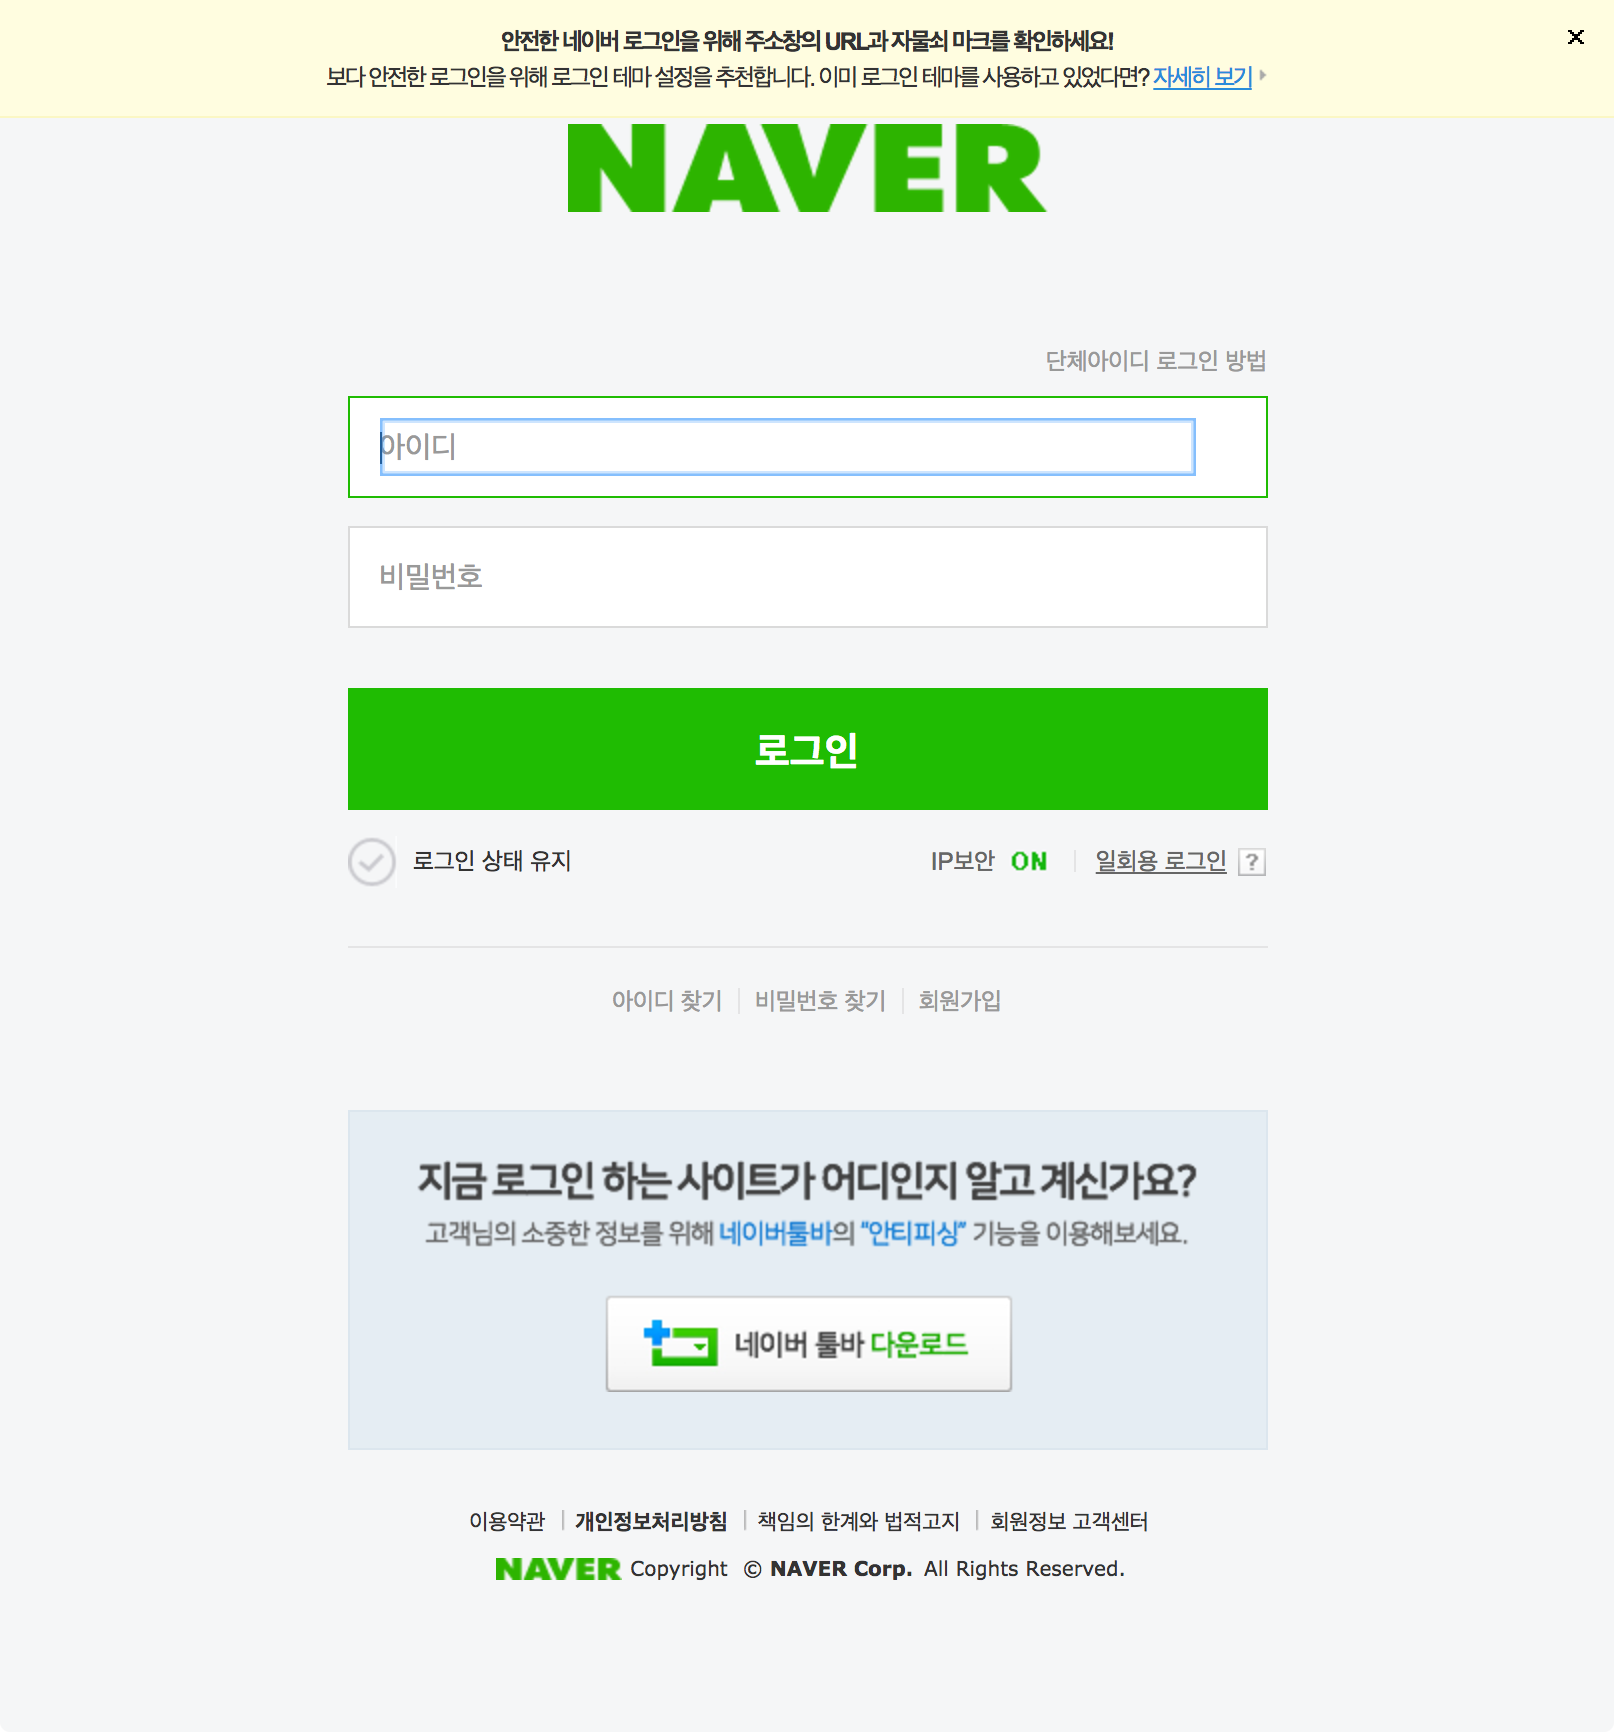

naver_after_login.png


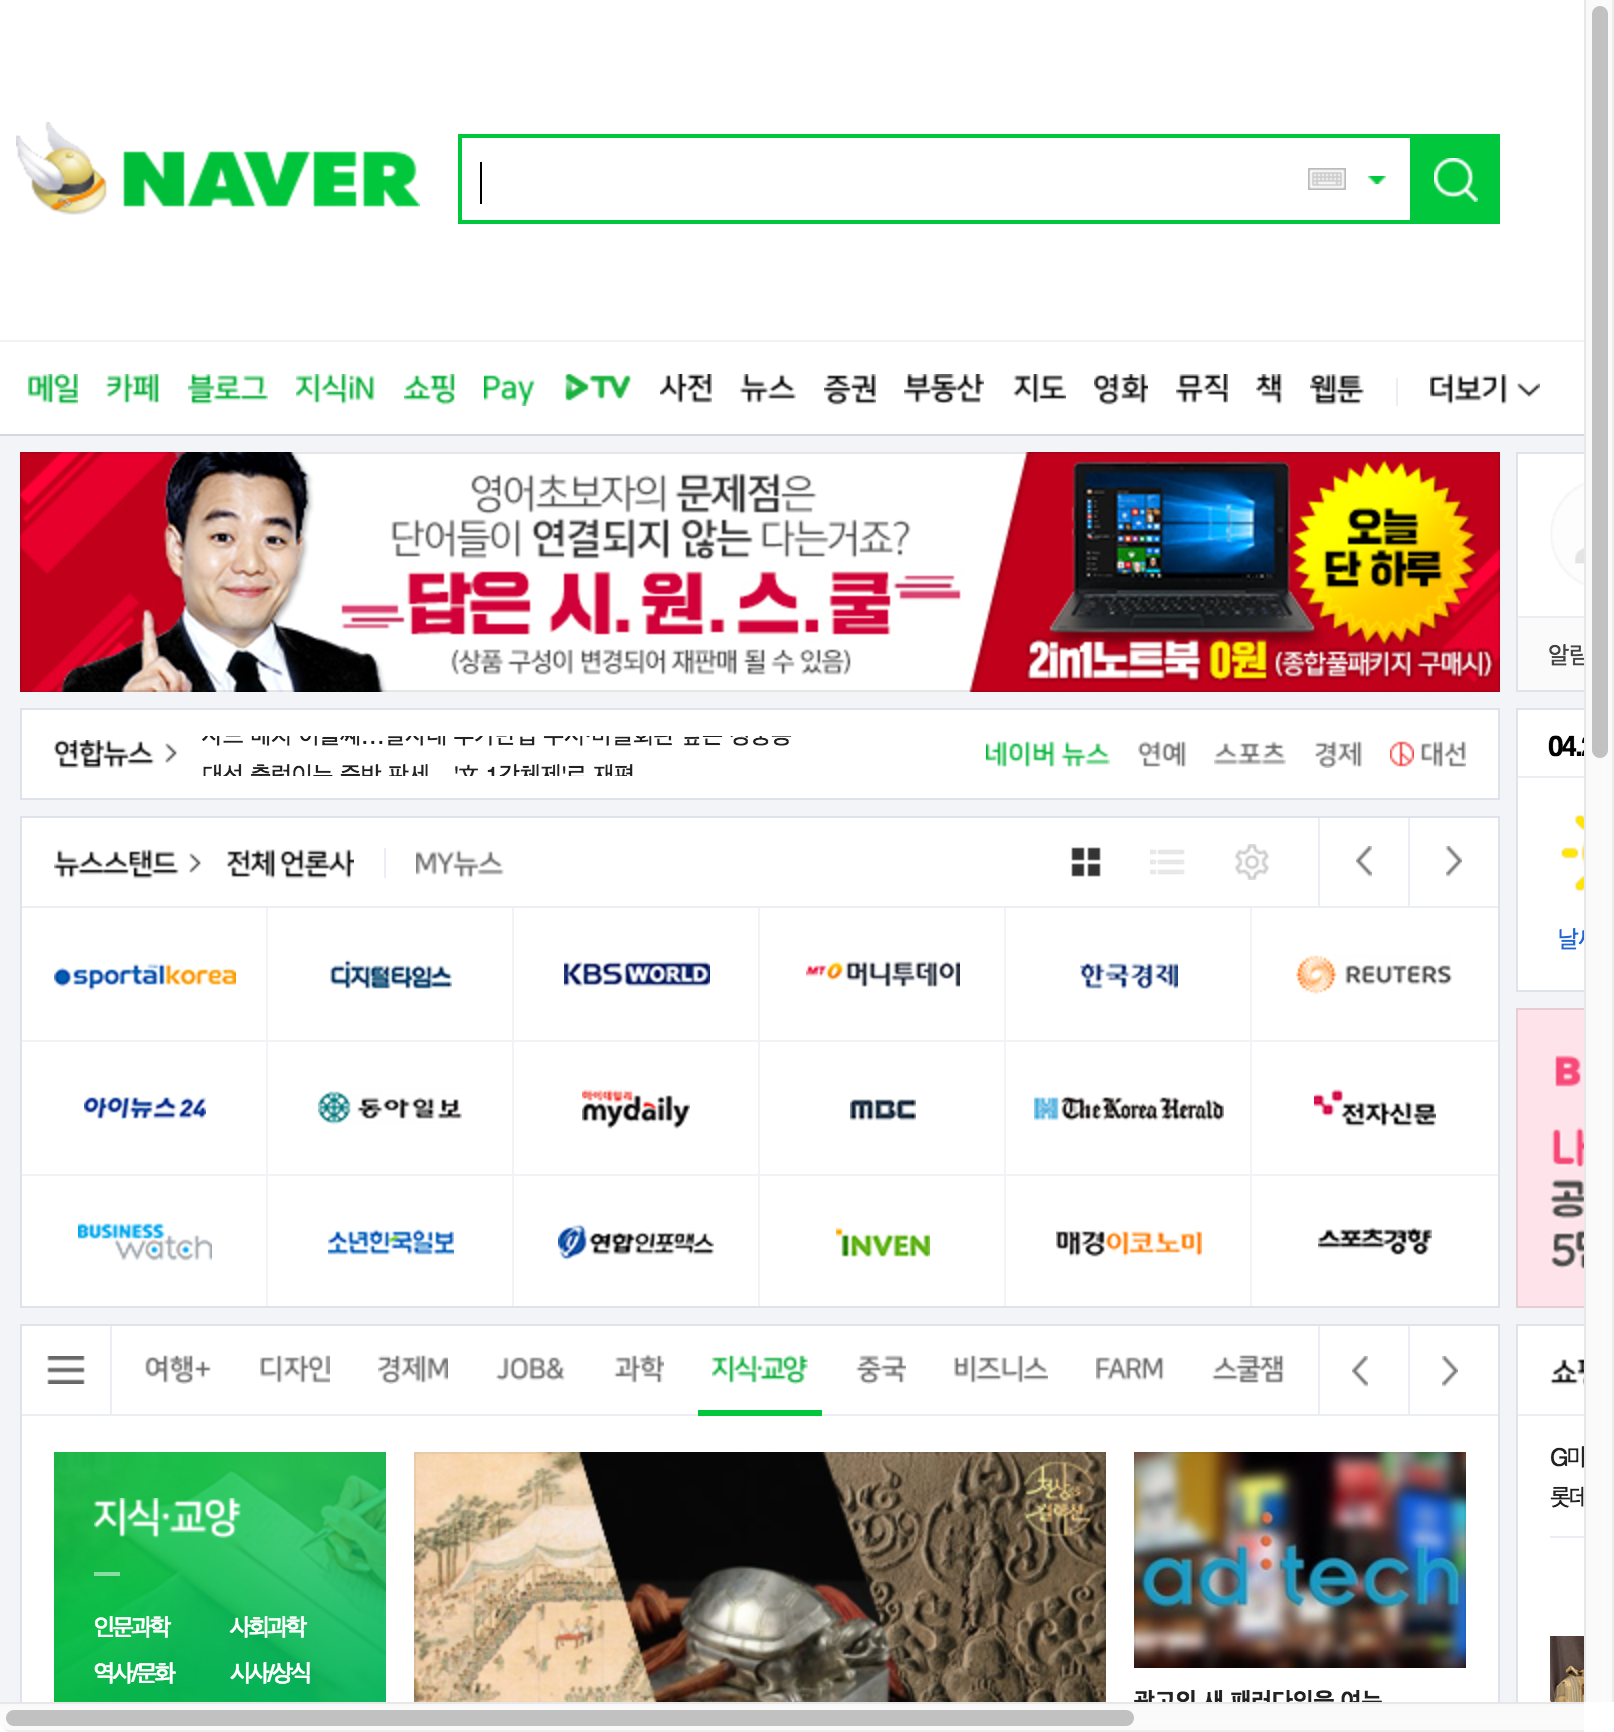

naver_mail.png


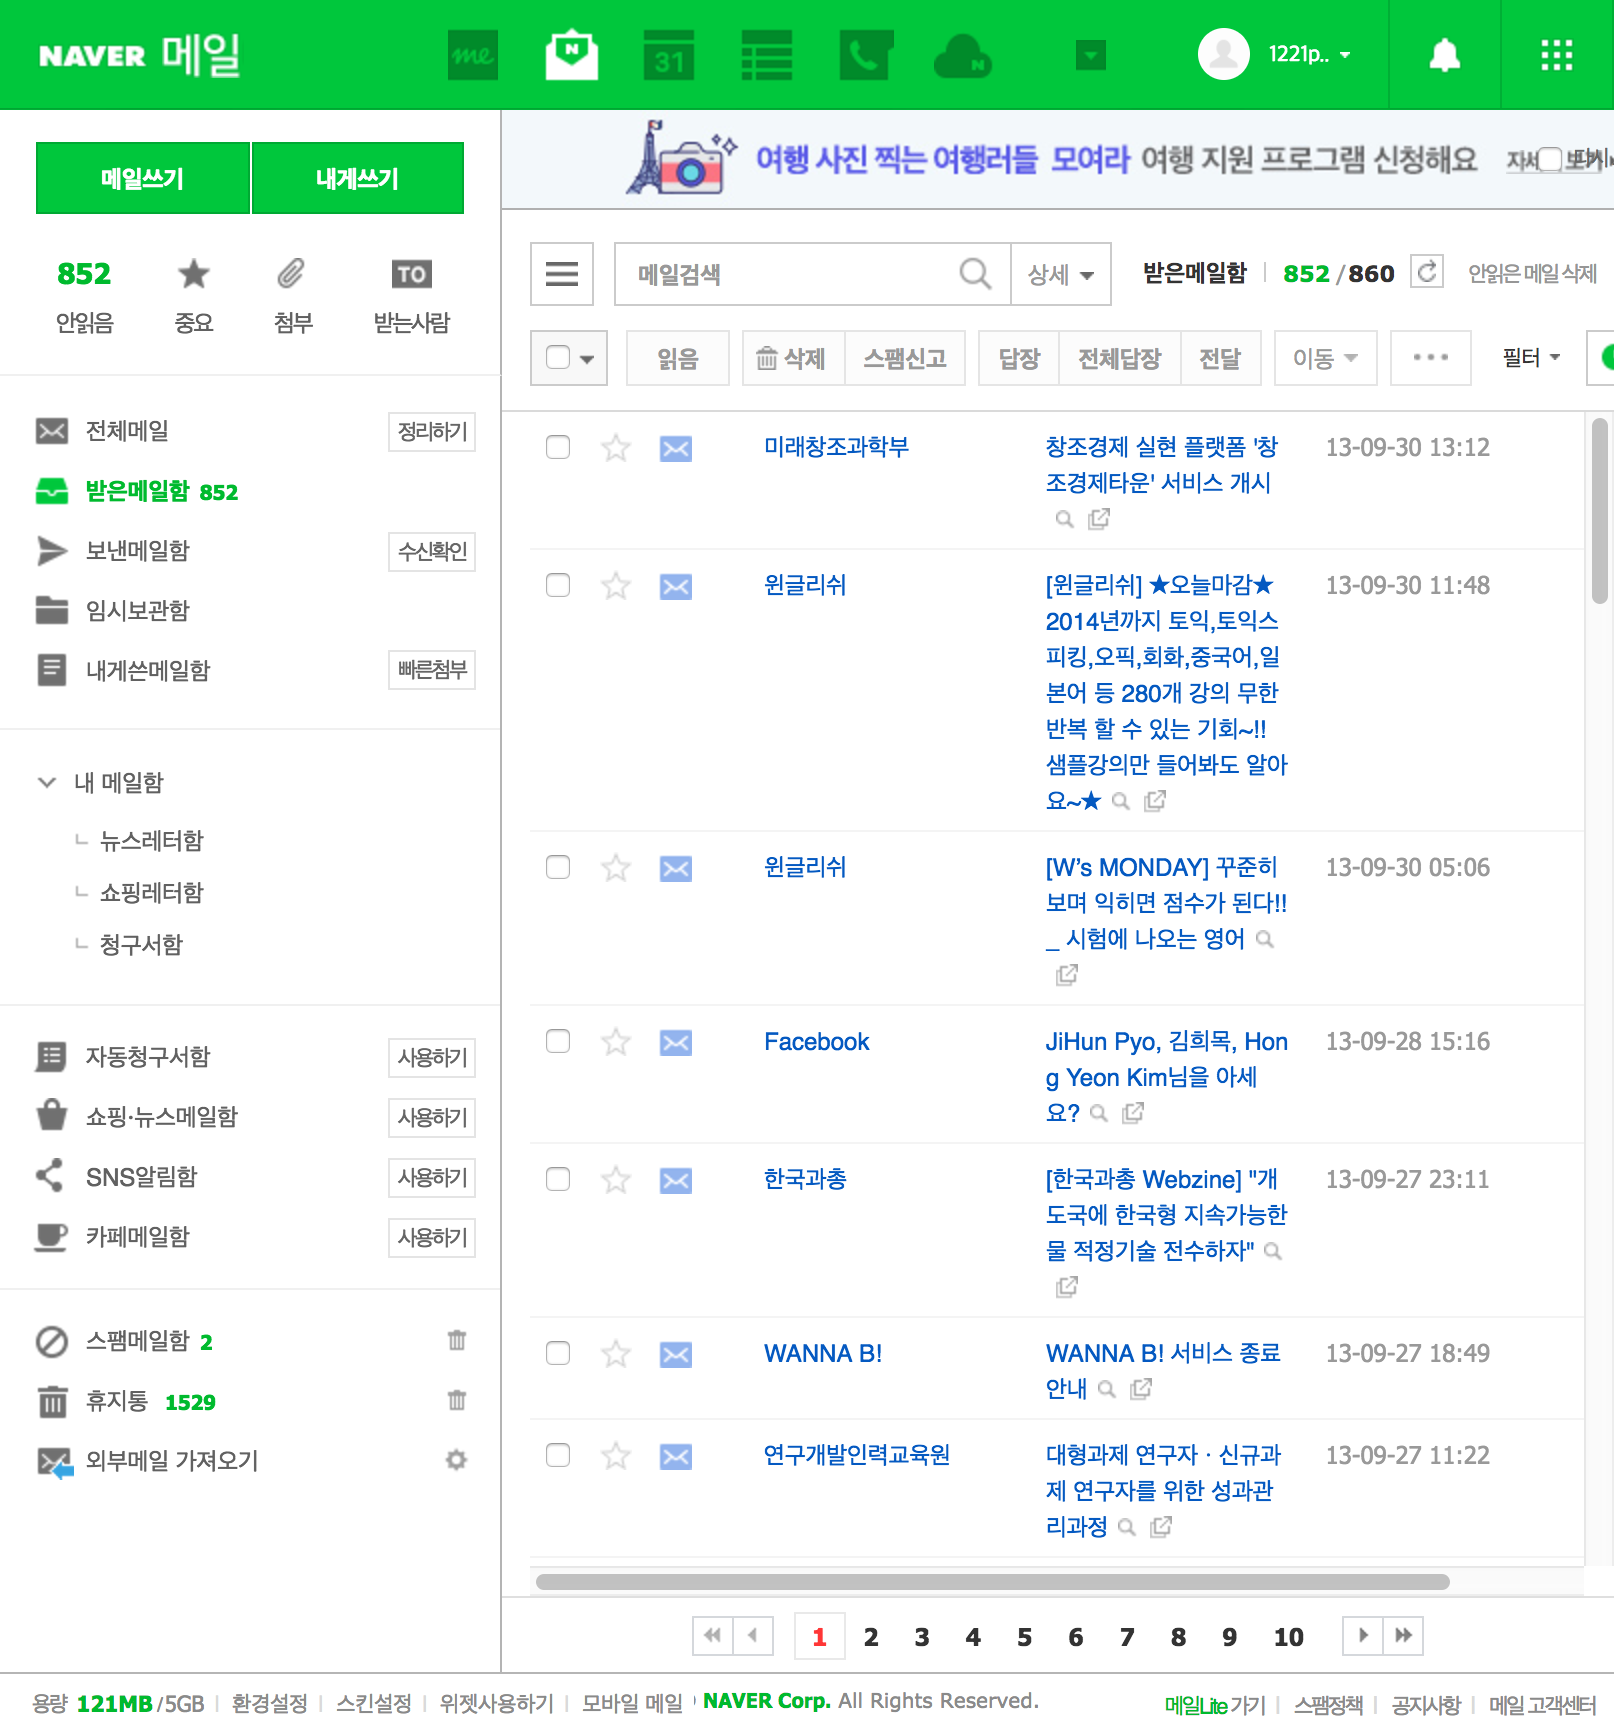

In [5]:
path = "./pages/"
for filename in filename_list:
    print(filename)
    display(Image(filename = path + filename))

### Make Thumbnail

In [6]:
size = (256, 256)
path = "./pages/"
for filename in filename_list:
    im = pil.open(path + filename)
    im.thumbnail(size)
    im.save(path + filename.split(".")[0] + "_thumbnail.png", "png")

naver_main_thumbnail.png


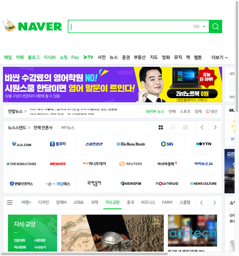

naver_login_thumbnail.png


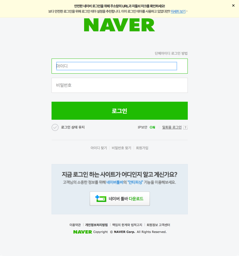

naver_after_login_thumbnail.png


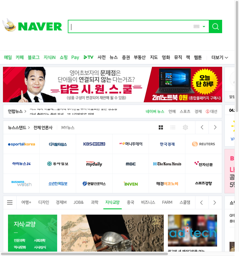

naver_mail_thumbnail.png


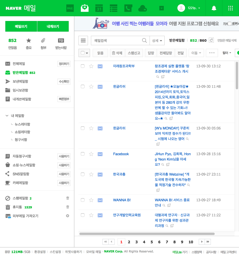

In [7]:
from IPython.display import Image
path = "./pages/"
for filename in filename_list:
    filename = filename.split(".")[0] + "_thumbnail.png"
    print(filename)
    display(Image(filename = path + filename))